In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from IPython.display import display, HTML


# Exploratory Data Analysis of Nutrient Content and Consumption

## Author: Tsvetan Dimitrov

### Abstract
The goal of this survey is to detect what are actually people eating and how much of it (broken down in its nutrient content). The first dataset we are going to use is the Open Food Facts dataset where we are going to detect how much sugar, carbohydrates, salt, sodium, protein, saturated fat, fat are the different countries consuming per 100g of food. Next we will use a dataset containing nutrition facts about McDonalds menu, which is one of the most popular types of food available worldwide.

### Open Food Facts
This data does not show us what people actually eat on any sort of basis, but it does show us what may be readily available to each user who uploads information. To accomplish the task set out above, we will aggregate the data by country and take mean values for sugar, salt, sodium, protein and fat per 100g as well as the number of entries used to calculate that mean. First we are going to read the dataset:

In [3]:
food_facts = pd.read_csv('data/en.openfoodfacts.org.products.tsv', low_memory=False, sep='\t')
pd.set_option("display.max_columns", len(food_facts.columns))
food_facts.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,United States,"Bananas, vegetable oil (coconut oil, cor

In [4]:
food_facts.shape

(356027, 163)

In [5]:
list(food_facts.columns)

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_en',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'allergens',
 'allergens_en',
 'traces',
 'traces_tags',
 'traces_en',
 'serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_en',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutritio

In [6]:
def count_nan_values(dataset):
    return dataset.apply(lambda x: sum(x.isnull()),axis=0)

count_nan_values(food_facts)

code                                        26
url                                         26
creator                                      3
created_t                                    3
created_datetime                            10
last_modified_t                              0
last_modified_datetime                       0
product_name                             17512
generic_name                            298313
quantity                                236742
packaging                               266068
packaging_tags                          266068
brands                                   29050
brands_tags                              29070
categories                              252728
categories_tags                         252752
categories_en                           252726
origins                                 330977
origins_tags                            331015
manufacturing_places                    314019
manufacturing_places_tags               314026
labels       

If the majorty of data is missing than interpolation will be highly skewed so we will drop the columns where 70% or more are missing values.

In [7]:
row_count = food_facts.shape[0]
nan_value_min_threshold = int((70 * row_count) / 100)
food_facts = food_facts.dropna(axis=1,thresh=nan_value_min_threshold)
food_facts.shape

(356027, 32)

In [8]:
food_facts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356027 entries, 0 to 356026
Data columns (total 32 columns):
code                                       356001 non-null object
url                                        356001 non-null object
creator                                    356024 non-null object
created_t                                  356024 non-null object
created_datetime                           356017 non-null object
last_modified_t                            356027 non-null object
last_modified_datetime                     356027 non-null object
product_name                               338515 non-null object
brands                                     326977 non-null object
brands_tags                                326957 non-null object
countries                                  355752 non-null object
countries_tags                             355752 non-null object
countries_en                               355752 non-null object
ingredients_text               

Above result shows that none of the rows is completely NULL. So lets drop the rows where at least 70% of the elements are NaN.

In [9]:
col_count = food_facts.shape[1]
nan_value_min_threshold = int((70 * col_count) / 100)
food_facts = food_facts.dropna(axis=0,thresh=nan_value_min_threshold)
food_facts.shape

(295010, 32)

Now we need to specify which nutrients are available to us that we want to measure and a function that could apply other functions on their corresponding columns.

In [10]:
# For consistency we will raname saturated-fat to saturated_fat
food_facts = food_facts.rename(columns={'saturated-fat_100g': 'saturated_fat_100g'})

MEASURED_NUTRIENTS = ['sugars', 'carbohydrates', 'salt', 'sodium', 'proteins', 'saturated_fat', 'fat']

def apply_nutrients(dataset, transform_func, nutrients=MEASURED_NUTRIENTS):
    result = None
    for nutrient in nutrients:
        col_name = f'{nutrient}_100g'
        result = transform_func(dataset, col_name)
    return result

### Outliar Detection

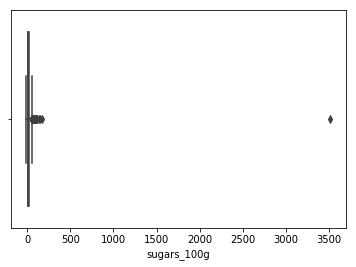

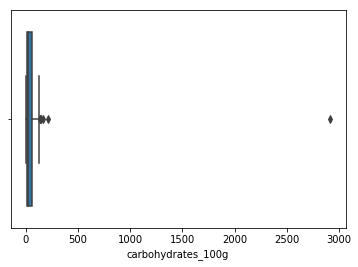

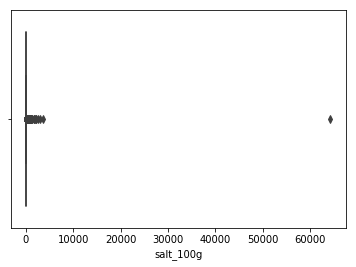

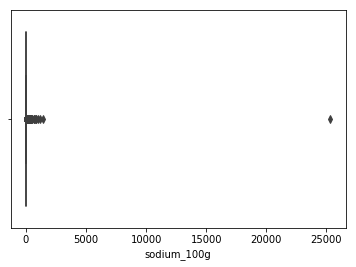

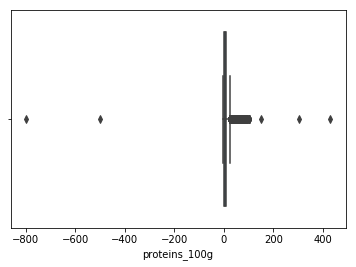

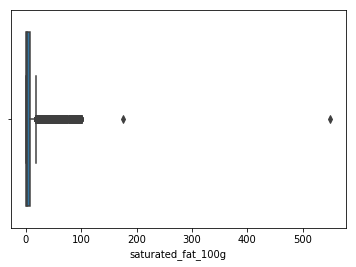

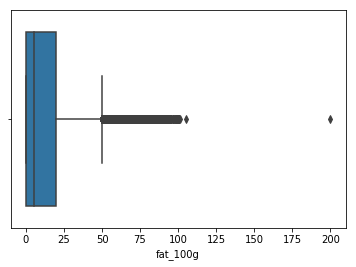

In [11]:
def draw_boxplots_per_nutrient(dataset, col_name):
    plt.figure()
    sns.boxplot(dataset[col_name])
        
apply_nutrients(food_facts, draw_boxplots_per_nutrient)

We can see that proteins have negative values which are obviously not legit so we have to remove them. But just to sure we will apply the same to all the nutrient columns. 

In [12]:
def remove_negative_values(dataset, col_name):
    dataset.loc[dataset[col_name] < 0, col_name] = 0

apply_nutrients(food_facts, remove_negative_values)
food_facts.shape

(295010, 32)

Now let's remove outliers from these columns. We know 99% of the data is in the third quartile so we will remove data present outside this range.

(271942, 32)

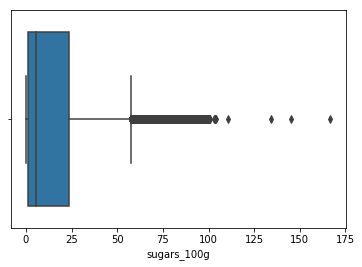

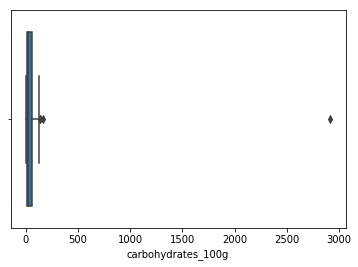

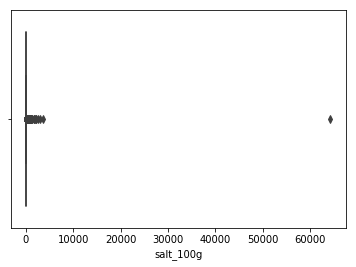

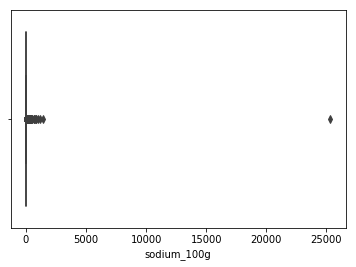

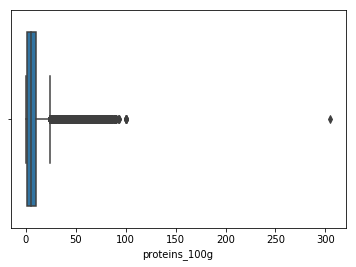

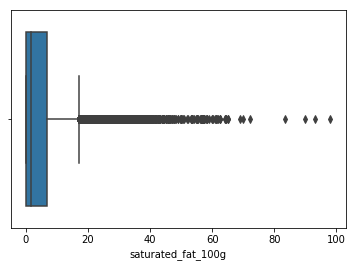

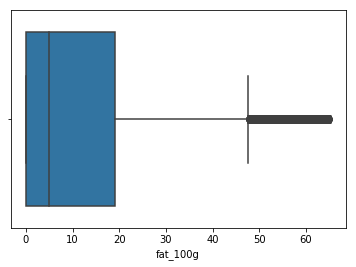

In [13]:
def remove_outliers(dataset, col_name): 
    return dataset[np.abs(dataset[col_name] - dataset[col_name].mean()) <= (3 * dataset[col_name].std())]

food_facts = apply_nutrients(food_facts, remove_outliers)
apply_nutrients(food_facts, draw_boxplots_per_nutrient)
food_facts.shape

Intuitively we know that all these above nutrients are not different for each product so we cannot interpolate them with some preditive model. Best way to do would to fill in mean value for these columns.

In [14]:
def fill_with_mean_values_where_nan(dataset, col_name):
    dataset[col_name].fillna(dataset[col_name].mean(), inplace=True)

apply_nutrients(food_facts, fill_with_mean_values_where_nan)
food_facts.shape

(271942, 32)

First we need to return mean values as well as number of values. Not all countries have nutrition data (some may have very few entries and there may not be any entries for the nutrient in question) so we set those mean values to `sys.maxsize` so that they can be filtered out later.

In [15]:
def get_nutrient_info(dataset, country, nutrient):
    col_name = f'{nutrient}_100g'
    country_df = dataset[(dataset['countries_en'] == country)][col_name]
    nutrient_list = list(country_df[country_df.notnull()])     
    entry_count = len(nutrient_list)
    
    if len(nutrient_list) == 0:
        nutrient_mean = sys.maxsize
    else:
        nutrient_mean = np.mean(nutrient_list)
        
    return nutrient_mean, entry_count

There are three features that show us country information: `"countries"`,`"countries_en"` and `"countries_tags"`. We need to decide which feature to use. Unfortunately, there is not very much information regarding the features, so we have to do a bit of guesswork. Let's explore after setting up a dictionary per country where `"countries_en"` are the keys and related `"countries"` are the values:

In [16]:
# Create a dictionary where "countries_en" are the keys and "countries" are the values
def get_all_country_names(dataset):
    all_country_list = []
    for country in list(dataset['countries_en'].unique()):
        try:
            if len(country.split(',')) == 1:
                all_country_list.append(country)
        except:
            print('Error:', country)

    all_country_dict = {}
    # Add other aliases of a country name, e.g. United States, US, etc.
    for country in all_country_list:
        all_country_dict[country] = list(dataset[dataset['countries_en'] == country]['countries'].unique())
    dataset.countries_tags.unique()
    return all_country_dict

It becomes apparent that `"countries"` is far more variable than `"countries_en"` where `"countries_en"` serves as an aggregation of `"countries"`. As shown below, the United States may be represented as any of the 11 different names in the `"countries"` feature, but it is represented as a whole as *"United States"* in the `"countries_en"` feature. We can imagine how difficult it might be to parse through each entry in `"countries"` to determine what all the different levels refer to, so keeping it high level with `"countries_en"` is in our best interest.

In [17]:
all_country_dict = get_all_country_names(food_facts)
all_country_dict['United States']

Error: nan


['US',
 'United States',
 'États-Unis',
 'en:US',
 'USA',
 'Etats-Unis',
 'United states',
 'en:US, US',
 'united-states',
 'Соединённые Штаты Америки',
 'Vereinigte Staaten von Amerika']

Next we need a function to associate country names with their nutrient consumption per 100g. We will extract average nutrient values per country as well as how many relevent entries have been made by users:

In [18]:
def collect_nutrient_stats_per_country(dataset, all_country_dict, nutrients=MEASURED_NUTRIENTS):
    nutrient_dict = {}
    for country in list(all_country_dict.keys()):
        nutrient_dict[country] = []

    # Fill in the empty dictionary with all nutrition info and entry counts per country
    for nutrient in nutrients:
        for country in list(all_country_dict.keys()):
            nutrient_dict[country] = nutrient_dict[country] + list(get_nutrient_info(dataset, country, nutrient))
    return nutrient_dict

After building a dictionary with the above mentioned data we can examine, e.g. the entry for the _United States_ where we get all needed numerical values which at this point we do not know which is which.

In [19]:
nutrient_dict = collect_nutrient_stats_per_country(food_facts, all_country_dict)
nutrient_dict['United States']

[17.211991305818525,
 167570,
 34.39883808975386,
 167570,
 2.487219585006603,
 167570,
 0.979219484029021,
 167570,
 6.920660309767995,
 167570,
 4.535942465982511,
 167570,
 10.793573384257325,
 167570]

Next step is to build a Pandas Dataframe with named features and our aggregated data as observations. We generate a mean value and an entry count for each measured nutrient.

In [20]:
def create_dataframe_with_features(nutrient_dict, nutrients=MEASURED_NUTRIENTS):
    df_columns = []
    for nutrient in nutrients:
        df_columns = df_columns + [f'avg_{nutrient}',
                                   f'{nutrient}_entry_count']
    
    # Transform the dictionary into a dataframe and display
    nutrient_df = pd.DataFrame.from_dict(nutrient_dict).T
    nutrient_df = nutrient_df.reset_index(drop=False)
    nutrient_df.columns = ['country'] + df_columns
    pd.set_option("display.max_columns", len(nutrient_df.columns))
    
    return nutrient_df

In [21]:
nutrient_df = create_dataframe_with_features(nutrient_dict)
print(f'Countries count: {len(nutrient_df)}')
nutrient_df.head()

Countries count: 99


,country,avg_sugars,sugars_entry_count,avg_carbohydrates,carbohydrates_entry_count,avg_salt,salt_entry_count,avg_sodium,sodium_entry_count,avg_proteins,proteins_entry_count,avg_saturated_fat,saturated_fat_entry_count,avg_fat,fat_entry_count
0,United States,17.211991,167570.0,34.398838,167570.0,2.487220,167570.0,0.979219,167570.0,6.920660,167570.0,4.535942,167570.0,10.793573,167570.0
1,Canada,17.412891,208.0,34.931714,208.0,1.977874,208.0,0.778041,208.0,7.135190,208.0,4.387820,208.0,11.183986,208.0
2,France,13.205717,74852.0,27.995450,74852.0,1.172525,74852.0,0.461637,74852.0,7.940428,74852.0,4.611979,74852.0,11.549225,74852.0
3,Germany,14.139422,4868.0,26.588306,4868.0,1.093958,4868.0,0.430694,4868.0,8.795501,4868.0,5.952781,4868.0,13.429362,4868.0
4,United Kingdom,15.270480,1565.0,27.433746,1565.0,1.037975,1565.0,0.408653,1565.0,7.765091,1565.0,4.842039,1565.0,11.729685,1565.0


In [22]:
nutrient_df.country

0                 United States
1                        Canada
2                        France
3                       Germany
4                United Kingdom
5                         Spain
6                        Mexico
7                  Saudi Arabia
8                     Australia
9                   Netherlands
10                  Switzerland
11                        Italy
12                    Hong Kong
13                         Cuba
14                       Sweden
15         United Arab Emirates
16    Saint Pierre and Miquelon
17                    fr:Quebec
18             French Polynesia
19                      Belgium
20                       Turkey
21                        China
22               European Union
23                       Serbia
24                     Colombia
25                      Denmark
26                     Portugal
27                         Peru
28                      Ireland
29                       Russia
                ...            
69      

It is time to do some cleanup. We can notice from the `"country"` column that there are some weird entries. First we want to remove all non English ones and some bad definitions of a country like, e.g. _European Union_, _World_, etc.
Additionally we have to filter those countries with no available nutrition data which we previously marked with `sys.maxsize`.

In [23]:
def drop_invalid_country_entries(nutrient_df): 
    countries_without_data = np.logical_not((nutrient_df == sys.maxsize).any(1))
    
    drop_countries = [
        'European Union', 
        'Other-japon', 
        'Other-turquie',              
        'World',
        'fr:Quebec', 
        'الإمارات-العربية-المتحدة',
        'السعودية',
        'تونس',
        'سلطنة-عمان'
        'لبنان',
        '香港',
        'भारत'
    ]
    inaccurate_countries = np.logical_not(nutrient_df['country'].isin(drop_countries))

    return nutrient_df[countries_without_data & inaccurate_countries]

In [24]:
cleaned_nutrient_df = drop_invalid_country_entries(nutrient_df)
print(f'Countries count: {len(cleaned_nutrient_df)}')

Countries count: 91


We are not done with filtering. Since some countries may dominate the dataset in terms of number of uploads, we have to be aware of the fact that aggregated information from countries with fewer entries may not be as accurate as countries with many entries. For example, a country with 10 000 entries and a mean sugar value per 100g of 20g is probably more reliable than a country with 50 entries and a mean sugar value per 100g of 40g, and the latter's true mean sugar content may not actually be much higher than that of the former. So we need to define an entry count threshold that we think should provide enough data to give accurate results. Based on some experimentation I chose 150 entries as our threshold.

In [25]:
def filter_above_nutrient_entry_count_threshold(dataset, entry_count_threshold, nutrients=MEASURED_NUTRIENTS):
    filter_query = ' & '.join([f'{nutrient}_entry_count > {entry_count_threshold}' for nutrient in nutrients])
    print(f'FILTER QUERY: {filter_query}')
    return dataset.query(filter_query)

filtered_nutrient_df = filter_above_nutrient_entry_count_threshold(cleaned_nutrient_df, 150)
print(f'Countries count {len(filtered_nutrient_df)}')
filtered_nutrient_df

FILTER QUERY: sugars_entry_count > 150 & carbohydrates_entry_count > 150 & salt_entry_count > 150 & sodium_entry_count > 150 & proteins_entry_count > 150 & saturated_fat_entry_count > 150 & fat_entry_count > 150
Countries count 15


,country,avg_sugars,sugars_entry_count,avg_carbohydrates,carbohydrates_entry_count,avg_salt,salt_entry_count,avg_sodium,sodium_entry_count,avg_proteins,proteins_entry_count,avg_saturated_fat,saturated_fat_entry_count,avg_fat,fat_entry_count
0,United States,17.211991,167570.0,34.398838,167570.0,2.487220,167570.0,0.979219,167570.0,6.920660,167570.0,4.535942,167570.0,10.793573,167570.0
1,Canada,17.412891,208.0,34.931714,208.0,1.977874,208.0,0.778041,208.0,7.135190,208.0,4.387820,208.0,11.183986,208.0
2,France,13.205717,74852.0,27.995450,74852.0,1.172525,74852.0,0.461637,74852.0,7.940428,74852.0,4.611979,74852.0,11.549225,74852.0
3,Germany,14.139422,4868.0,26.588306,4868.0,1.093958,4868.0,0.430694,4868.0,8.795501,4868.0,5.952781,4868.0,13.429362,4868.0
4,United Kingdom,15.270480,1565.0,27.433746,1565.0,1.037975,1565.0,0.408653,1565.0,7.765091,1565.0,4.842039,1565.0,11.729685,1565.0
5,Spain,12.656254,3051.0,27.213601,3051.0,1.199492,3051.0,0.472254,3051.0,6.064756,3051.0,3.534971,3051.0,10.906278,3051.0
8,Australia,13.805262,519.0,25.939689,519.0,3.440542,519.0,1.354542,519.0,6.891468,519.0,4.214426,519.0,9.249902,519.0
9,Netherlands,19.961136,265.0,35.419105,265.0,1.422841,265.0,0.560177,265.0,7.516594,265.0,4.716872,265.0,13.121660,265.0
10,Switzerland,15.639274,10024.0,30.437586,10024.0,1.174074,10024.0,0.464522,10024.0,7.109848,10024.0,5.295516,10024.0,11.916402,10024.0
11,Italy,12.107763,413.0,37.503293,413.0,1.143675,413.0,0.450269,413.0,7.805332,413.0,4.640701,413.0,10.366562,413.0


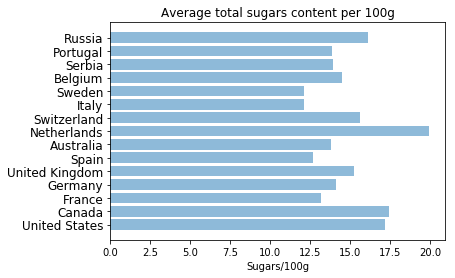

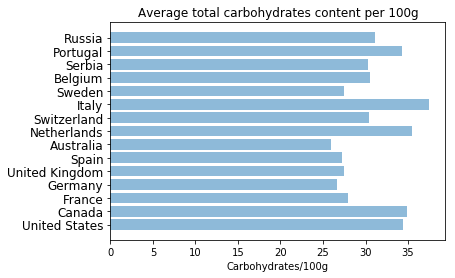

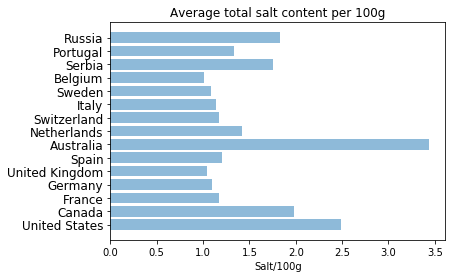

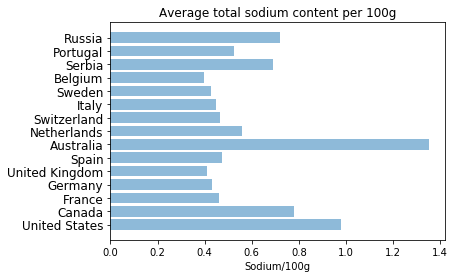

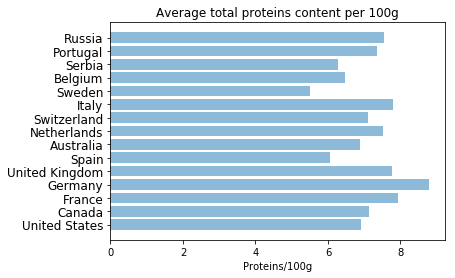

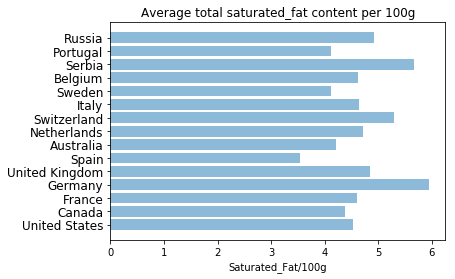

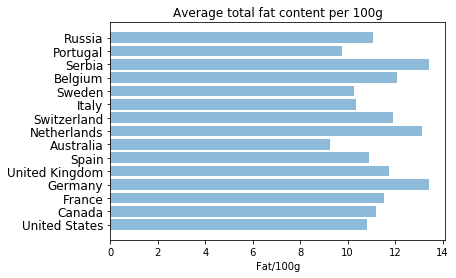

In [26]:
def plot_nutrient_consumption_per_country(dataset, nutrient):
    x_pos = np.arange(len(dataset.country))
    plt.barh(x_pos, dataset[f'avg_{nutrient}'], align='center', alpha=0.5)
    plt.title(f'Average total {nutrient} content per 100g')
    plt.yticks(x_pos, dataset.country, fontsize = 12)
    plt.xlabel(f'{nutrient.title()}/100g')
    plt.show()

for nutrient in MEASURED_NUTRIENTS:
    plot_nutrient_consumption_per_country(filtered_nutrient_df, nutrient)

In [27]:
def get_country_with_max_content_per_nutrient(dataset, nutrient):
    avg_nutrient_col_name = f'avg_{nutrient}'
    x = max(dataset[avg_nutrient_col_name])
    filtered_dataset = dataset[(dataset[avg_nutrient_col_name] == x)]
    return filtered_dataset[['country', avg_nutrient_col_name]]

for nutrient in MEASURED_NUTRIENTS:
    df = get_country_with_max_content_per_nutrient(filtered_nutrient_df, nutrient)
    print(f'Top {nutrient.title()}/100g consuming country')
    display(HTML(df.to_html(index=False)))

Top Sugars/100g consuming country


country,avg_sugars
Netherlands,19.961136


Top Carbohydrates/100g consuming country


country,avg_carbohydrates
Italy,37.503293


Top Salt/100g consuming country


country,avg_salt
Australia,3.440542


Top Sodium/100g consuming country


country,avg_sodium
Australia,1.354542


Top Proteins/100g consuming country


country,avg_proteins
Germany,8.795501


Top Saturated_Fat/100g consuming country


country,avg_saturated_fat
Germany,5.952781


Top Fat/100g consuming country


country,avg_fat
Serbia,13.440792


### Find correlations in numerical features

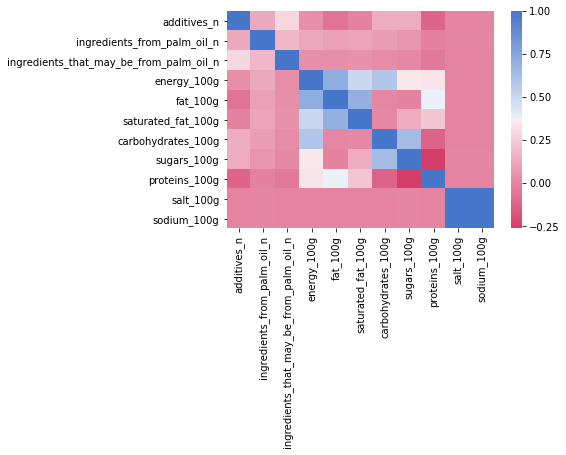

In [28]:
cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)

correlations = food_facts[['additives_n','ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n','energy_100g','fat_100g',
                   'saturated_fat_100g','carbohydrates_100g','sugars_100g','proteins_100g','salt_100g','sodium_100g']].corr()
sns.heatmap(correlations, cmap=cmap)

In [29]:
mcdonalds_data = pd.read_csv('data/menu.csv')
pd.set_option("display.max_columns", len(mcdonalds_data.columns))
mcdonalds_data.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10


In [30]:
print(mcdonalds_data.shape)
mcdonalds_data.describe()

(260, 24)


,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,20.676923,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,24.034954,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,4.750000,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,8.000000,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,36.250000,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,150.000000,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


In [31]:
NUTRIENT_CATEGORIES = ['Cholesterol', 'Sugars', 'Sodium', 'Carbohydrates', 'Protein', 'Saturated Fat', 'Trans Fat', 'Total Fat', 'Dietary Fiber']

In [32]:
def get_menu_categories_per_max_nutrient_content(dataset, nutrient):
    x = max(dataset[nutrient])
    filtered_dataset = dataset[(dataset[nutrient] == x)]
    return filtered_dataset[['Category', 'Item', nutrient]]

for nutrient in NUTRIENT_CATEGORIES:
    df = get_menu_categories_per_max_nutrient_content(mcdonalds_data, nutrient)
    print(f'Menu items and menu categories containing max {nutrient} levels')
    display(HTML(df.to_html(index=False)))

Menu items and menu categories containing max Cholesterol levels


Category,Item,Cholesterol
Breakfast,Big Breakfast with Hotcakes (Regular Biscuit),575
Breakfast,Big Breakfast with Hotcakes (Large Biscuit),575


Menu items and menu categories containing max Sugars levels


Category,Item,Sugars
Smoothies & Shakes,McFlurry with M&M’s Candies (Medium),128


Menu items and menu categories containing max Sodium levels


Category,Item,Sodium
Chicken & Fish,Chicken McNuggets (40 piece),3600


Menu items and menu categories containing max Carbohydrates levels


Category,Item,Carbohydrates
Smoothies & Shakes,Chocolate Shake (Large),141


Menu items and menu categories containing max Protein levels


Category,Item,Protein
Chicken & Fish,Chicken McNuggets (40 piece),87


Menu items and menu categories containing max Saturated Fat levels


Category,Item,Saturated Fat
Breakfast,Big Breakfast with Hotcakes (Large Biscuit),20.0
Chicken & Fish,Chicken McNuggets (40 piece),20.0
Coffee & Tea,Frappé Chocolate Chip (Large),20.0
Smoothies & Shakes,McFlurry with M&M’s Candies (Medium),20.0


Menu items and menu categories containing max Trans Fat levels


Category,Item,Trans Fat
Beef & Pork,Double Quarter Pounder with Cheese,2.5


Menu items and menu categories containing max Total Fat levels


Category,Item,Total Fat
Chicken & Fish,Chicken McNuggets (40 piece),118.0


Menu items and menu categories containing max Dietary Fiber levels


Category,Item,Dietary Fiber
Breakfast,Big Breakfast with Hotcakes (Large Biscuit),7
Breakfast,Big Breakfast with Hotcakes and Egg Whites (La...,7
Salads,Premium Southwest Salad with Crispy Chicken,7
Salads,Premium Southwest Salad with Grilled Chicken,7


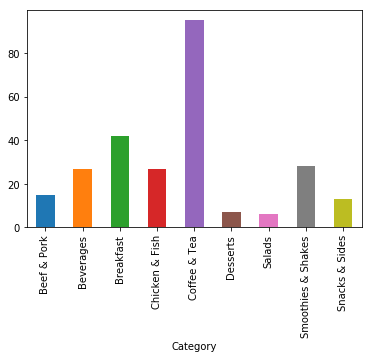

In [33]:
mcdonalds_data.groupby('Category')['Item'].count().plot(kind='bar')

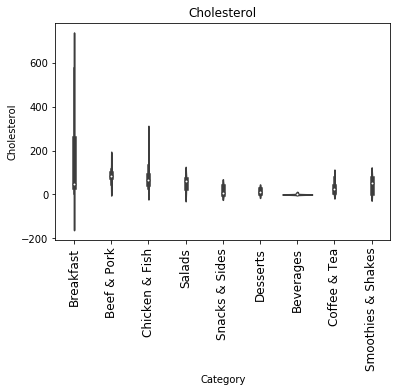

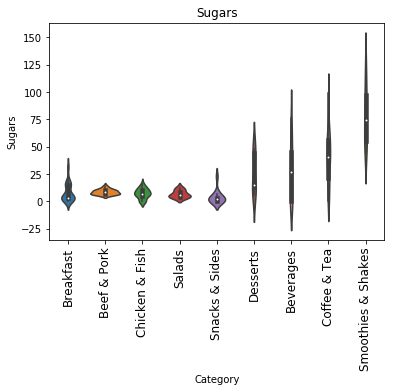

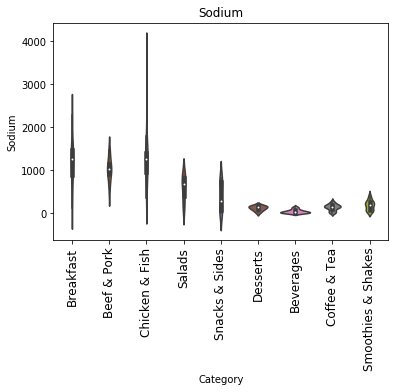

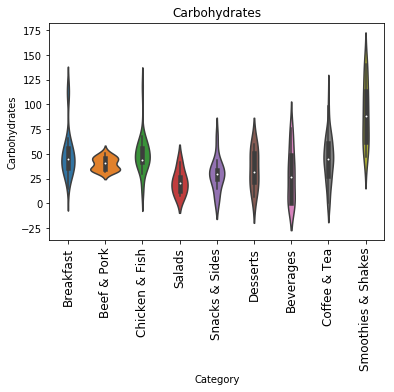

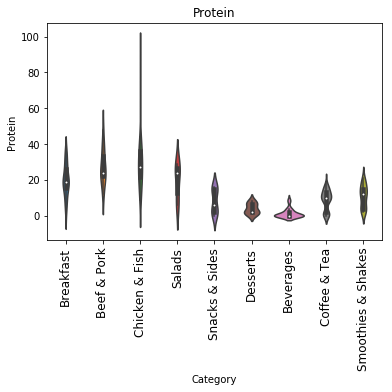

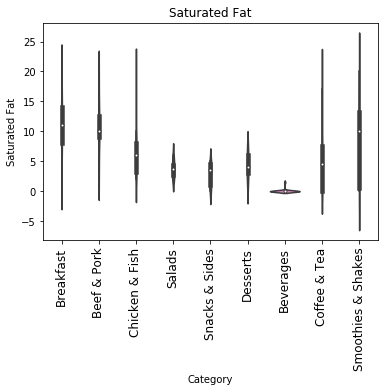

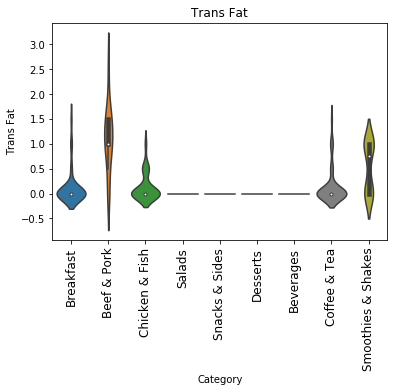

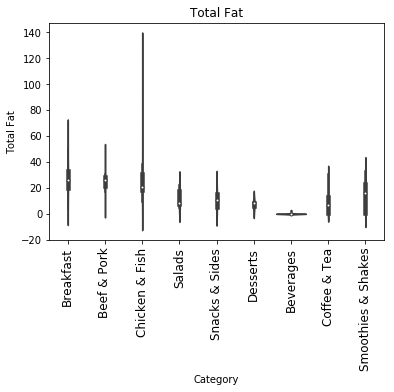

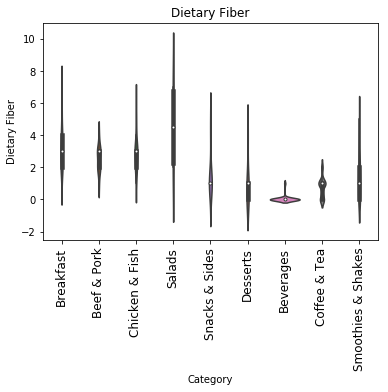

In [34]:
for nutrient in NUTRIENT_CATEGORIES:   
    plot = sns.violinplot(x="Category", y=nutrient, data=mcdonalds_data)
    plt.xticks(rotation=90, size=12)
    plt.title(nutrient)
    plt.show()